In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as const

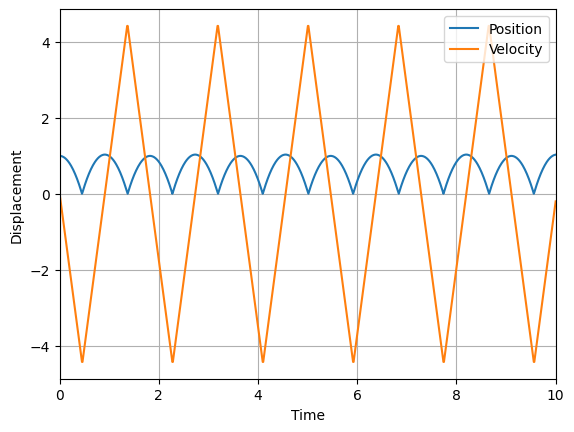

In [3]:
N = 1000
t = np.linspace(0,10,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0

def force(x):
     return -const.g * np.sign(x)

def leapfrog(x0, v0, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i])
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1])

    return x,v

x, v = leapfrog(x0, v0, dt, N)

plt.figure()
plt.plot(t, np.abs(x), label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlim(0, 10)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

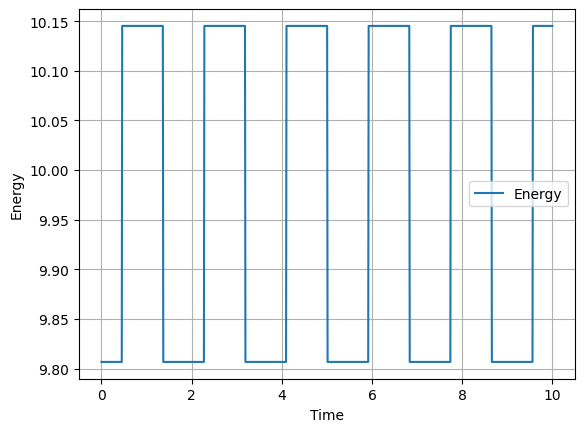

In [4]:
H = 0.5 * v **2 + const.g * np.abs(x)

plt.figure()
plt.plot(t, H, label = 'Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()

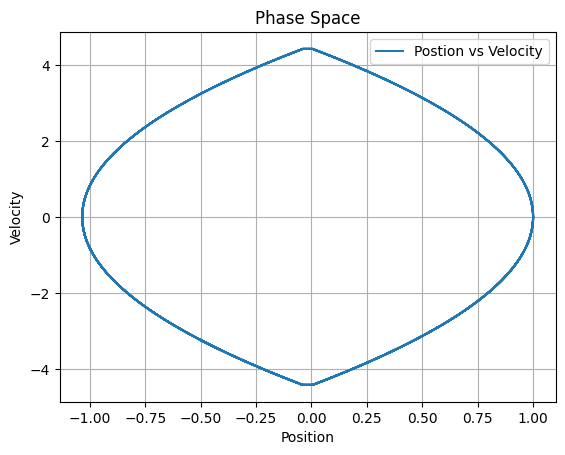

In [5]:
plt.figure()
plt.plot(x, v, label = 'Postion vs Velocity')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space')
plt.legend()
plt.grid()
plt.show()

## New Force

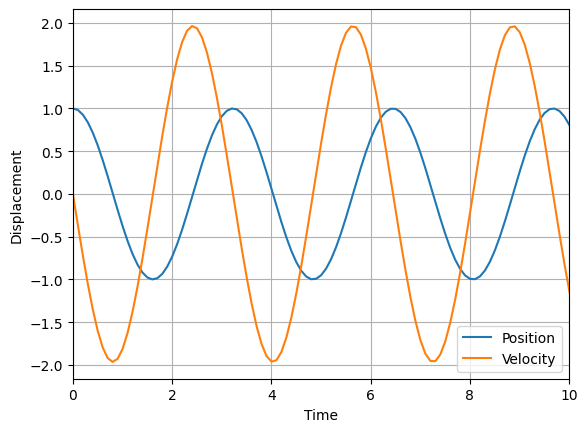

In [6]:
N = 1000
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0
x_s = 1.5

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)

def leapfrog(x0, v0, x_s, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return x,v

x, v = leapfrog(x0, v0, x_s, dt, N)

plt.figure()
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlim(0, 10)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

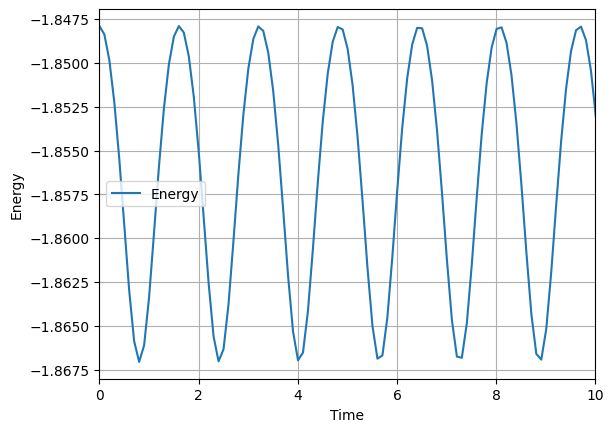

In [7]:
H = 0.5 * v**2 + -const.g/np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))

plt.figure()
plt.plot(t, H, label = 'Energy')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()

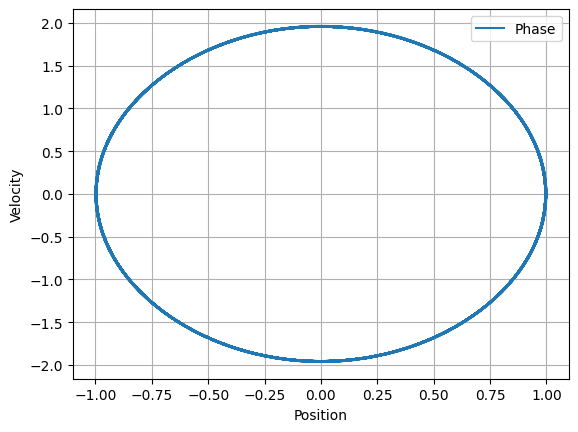

In [8]:
plt.figure()
plt.plot(x, v, label = 'Phase')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend()
plt.grid()
plt.show()

# Solutions Comparison

In [10]:
# Parameters

x0 = 1
v0 = 0
N = 1000  
orbits = 10
w = 1
x_s = 1.5
T = 2 * np.pi/w
t_final = orbits * T

#Analytic Solution
def analytic_solution(t, x0, v0, N):
    x = x0 + v0 * t - 0.5 * const.g * t **2

    for i in range(N-1):
        x[i+1] = v[i]*(t[i])


def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)

x_analytic = analytic_solution(t, x0, v0, N)

def numerical_solution(x0, v0, x_s, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return x,v

x, v = numerical_solution(x0, v0, x_s, dt, N)

#Step Size
stepsizes = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
errors_position = []
errors_velocity = []

for h in stepsizes:
    N = int(t_final / h) + 1
    t = np.linspace(0, t_final, N)
    dt = t[1] - t[0]

    x_analytic, v_analytic = analytic_solution(t, x0, v0, N)
    x_numerical, v_numerical = numerical_solution(x0, v0, x_s, dt, N)

    # Error Calculation
    error_x = np.max(np.abs(x_numerical - x_analytic))
    error_v = np.max(np.abs(v_numerical - v_analytic))

    errors_position.append(error_x)
    errors_velocity.append(error_v)

plt.figure()

plt.subplot(1,2,1)
plt.plot(stepsizes, errors_position, label = 'Numerical Error', marker = 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Stepsize")
plt.ylabel('Error in Position')
plt.title('Errors in Position vs Stepsize')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(stepsizes, errors_velocity, label = 'Numerical Error', marker = 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Stepsize")
plt.ylabel('Error in Velocity')
plt.title('Errors in Velocity vs Stepsize')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

TypeError: cannot unpack non-iterable NoneType object